In [5]:
# Nativos
import os
import sys

#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
from graphs import *

In [6]:
train = pd.read_csv('data/train.csv', **set_parameter_csv)
train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [7]:
test = pd.read_csv('data/test.csv', **set_parameter_csv)
test.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


## VISTAZO A LOS DATOS HISTORICOS

In [4]:
historical = pd.read_csv('data/historical_user_logs.csv', **set_parameter_csv)
historical.head()

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
1,2017-05-29 07:08,499679,F,view
2,2017-05-29 07:10,499679,G,view
3,2017-05-29 07:10,499679,G,view
4,2017-05-29 07:10,499679,G,view


In [5]:
train.shape, test.shape, historical.shape

((463291, 15), (128858, 14), (24287534, 4))

In [6]:
historical['action'].value_counts(dropna=False)

view        23854100
interest      433434
Name: action, dtype: int64

In [7]:
historical['product'].value_counts(dropna=False)

H    7972082
B    4768856
D    2164769
A    1873905
C    1746959
G    1742742
F    1722462
I    1702103
E     570012
J      23644
Name: product, dtype: int64

In [8]:
conteo_user = historical['user_id'].value_counts(dropna=False)
conteo_user.max(), conteo_user.min(), conteo_user.mean()

(13166, 1, 141.77617054562225)

In [101]:
def graphs_box_disp(serie, **kwargs):
    color_label = kwargs.get('color_label', 'black')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    graphs = [
        sns.boxplot(x=serie, ax=axes[0]),
        sns.distplot(serie, kde=True, rug=False, bins=100, ax=axes[1])
    ]
    for _ in graphs:
        _.xaxis.label.set_color(color_label)
        _.tick_params(colors=color_label)

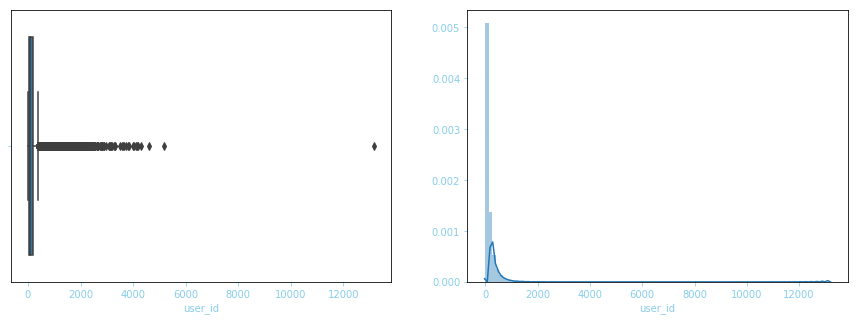

In [102]:
graphs_box_disp(conteo_user, color_label='skyblue')

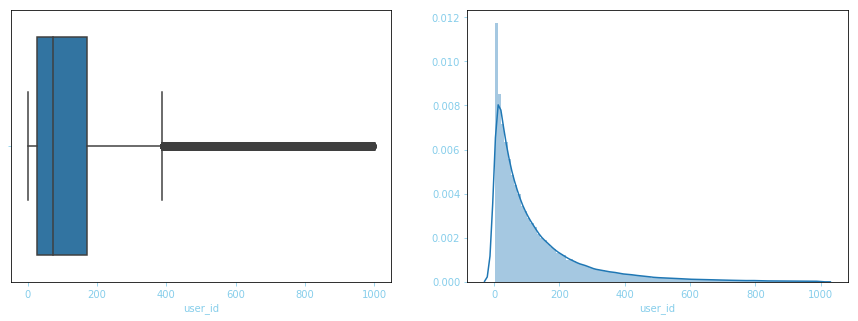

In [112]:
graphs_box_disp(conteo_user[conteo_user < 1000], color_label='skyblue')

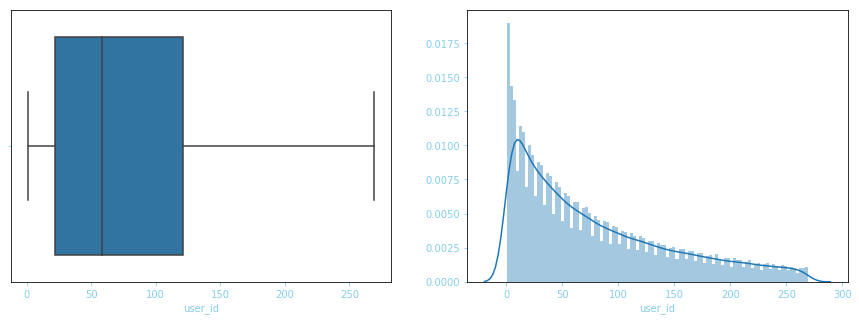

In [121]:
graphs_box_disp(conteo_user[conteo_user < 270], color_label='skyblue')

In [126]:
historical['num_register'] = historical['user_id'].apply(lambda x: conteo_user[x])

In [127]:
historical.head()

,DateTime,user_id,product,action,num_register
0,2017-05-28 15:44,704,B,view,28
1,2017-05-29 07:08,499679,F,view,134
2,2017-05-29 07:10,499679,G,view,134
3,2017-05-29 07:10,499679,G,view,134
4,2017-05-29 07:10,499679,G,view,134


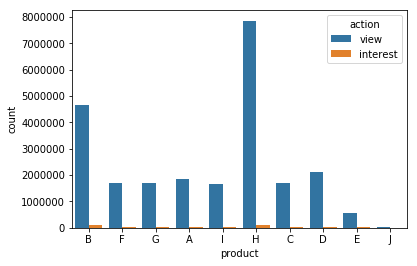

In [129]:
sns.countplot(x='product', hue='action', data=historical)

In [131]:
historical['action'].value_counts(dropna=False)

view        23854100
interest      433434
Name: action, dtype: int64

In [132]:
dicc_action = {
    'view': 1,
    'interest': 0
}
historical['action'] = historical['action'].map(dicc_action)

Series([], dtype: float64)


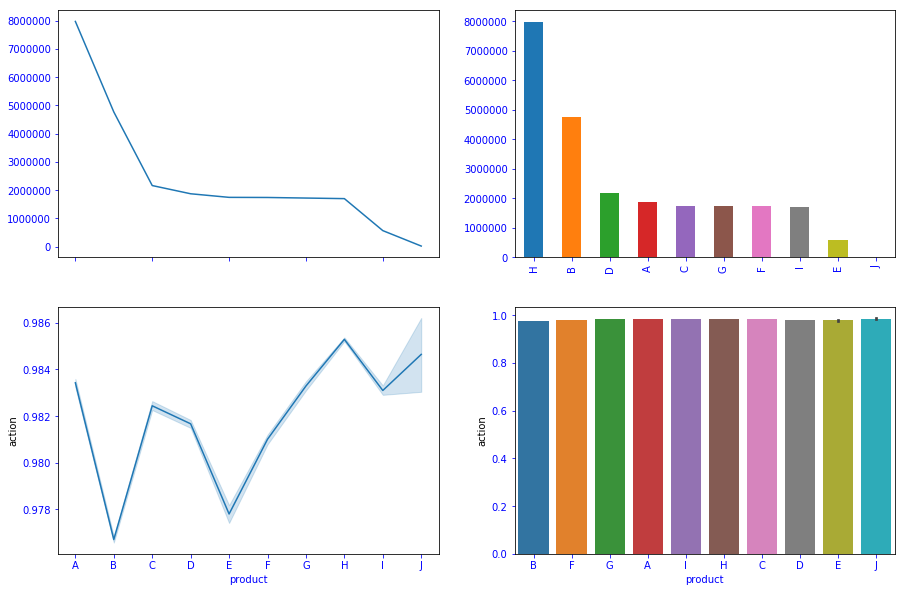

In [133]:
graphs_analysis(historical, 'product', 'action', color_label='blue')

In [134]:
historical.pivot_table(
    index = ['product'], 
    columns = ['action'], 
    values = ['user_id'], 
    aggfunc = 'count',
    dropna=False, fill_value=0, margins=True
)

user_id                    
action        0         1       All
product                            
A         31057   1842848   1873905
B        111127   4657729   4768856
C         30678   1716281   1746959
D         39690   2125079   2164769
E         12658    557354    570012
F         32722   1689740   1722462
G         29121   1713621   1742742
H        117248   7854834   7972082
I         28770   1673333   1702103
J           363     23281     23644
All      433434  23854100  24287534

In [ ]:
def ratio_convergencia(data, var, col_id='ID_CLIENTE', col_target='TARGET'):
    print("--------------------------------------------------------")
    print("Var", var,":")
    df = data.groupby(
        by=[var], 
        as_index=False
    ).agg(
        {col_id:'count', col_target:'mean'}
    ).rename(
        columns= {col_id:'FREC', col_target: 'RT_CONVERSION'}
    )
    return df

In [137]:
ratio_convergencia(historical, 'product', col_id='user_id', col_target='action')

--------------------------------------------------------
Var product :


,product,FREC,RT_CONVERSION
0,A,1873905,0.983427
1,B,4768856,0.976697
2,C,1746959,0.982439
3,D,2164769,0.981665
4,E,570012,0.977793
5,F,1722462,0.981003
6,G,1742742,0.983290
7,H,7972082,0.985293
8,I,1702103,0.983097
9,J,23644,0.984647


In [8]:
def  add_col_dates(data, col, format_match="%d-%b-%y", month=True, day=True, year=True,
                   weekday=True, replace_str=False, format_str_replace='%Y/%m/%d', replicate_in_test=False):
    """
        por optimizar en casos separados para data y test_data
    """
    data['date'] = pd.to_datetime(data[col], format=format_match)

    if month:
        data['month'] = pd.to_numeric(data['date'].dt.strftime('%m'), errors='coerce')
        data['month'].fillna(-99)  
    if day:
        data['day'] = pd.to_numeric(data['date'].dt.strftime('%d'), errors='coerce')
        data['day'].fillna(-99)
    if year:
        data['year'] = pd.to_numeric(data['date'].dt.strftime('%Y'), errors='coerce')
        data['year'].fillna(-99)
    if weekday:
        data['weekday'] = pd.to_numeric(data['date'].dt.strftime('%w'), errors='coerce')
        data['weekday'].fillna(-99)
        
    data['hour'] = pd.to_numeric(data['date'].dt.strftime('%H'), errors='coerce')
    data['hour'].fillna(-99)
    data['minute'] = pd.to_numeric(data['date'].dt.strftime('%M'), errors='coerce')
    data['minute'].fillna(-99)
    if replace_str:
        data['date'] = data['date'].dt.strftime(format_str_replace)
        
    return(data.head(10))

In [142]:
historical.head()

,DateTime,user_id,product,action,num_register
0,2017-05-28 15:44,704,B,1,28
1,2017-05-29 07:08,499679,F,1,134
2,2017-05-29 07:10,499679,G,1,134
3,2017-05-29 07:10,499679,G,1,134
4,2017-05-29 07:10,499679,G,1,134


In [143]:
add_col_dates(historical, 'DateTime', 
              format_match="%Y-%m-%d %H:%M",
              month=True, day=True, year=True,
              weekday=True, replace_str=False,
              replicate_in_test=False
             )

,DateTime,user_id,product,action,num_register,date,month,day,year,weekday,hour,minute
0,2017-05-28 15:44,704,B,1,28,2017-05-28 15:44:00,5,28,2017,0,15,44
1,2017-05-29 07:08,499679,F,1,134,2017-05-29 07:08:00,5,29,2017,1,7,8
2,2017-05-29 07:10,499679,G,1,134,2017-05-29 07:10:00,5,29,2017,1,7,10
3,2017-05-29 07:10,499679,G,1,134,2017-05-29 07:10:00,5,29,2017,1,7,10
4,2017-05-29 07:10,499679,G,1,134,2017-05-29 07:10:00,5,29,2017,1,7,10
5,2017-05-29 07:10,499679,G,1,134,2017-05-29 07:10:00,5,29,2017,1,7,10
6,2017-05-29 07:10,499679,G,1,134,2017-05-29 07:10:00,5,29,2017,1,7,10
7,2017-05-29 07:10,499679,G,1,134,2017-05-29 07:10:00,5,29,2017,1,7,10
8,2017-05-29 07:10,499679,G,1,134,2017-05-29 07:10:00,5,29,2017,1,7,10
9,2017-05-29 07:11,499679,G,1,134,2017-05-29 07:11:00,5,29,2017,1,7,11


In [145]:
historical = historical.sort_values(['user_id', 'date'])

In [9]:
add_col_dates(train, 'DateTime', 
              format_match="%Y-%m-%d %H:%M",
              month=True, day=True, year=True,
              weekday=True, replace_str=False,
              replicate_in_test=False
             )
train = train.sort_values(['user_id', 'date'])

In [10]:
add_col_dates(test, 'DateTime', 
              format_match="%Y-%m-%d %H:%M",
              month=True, day=True, year=True,
              weekday=True, replace_str=False,
              replicate_in_test=False
             )
test = test.sort_values(['user_id', 'date'])

In [12]:

del train['DateTime']
del train['year']
del test['DateTime']
del test['year']

In [13]:
null_verificator(train)

,Nulos,Cantidad,Tipo Col,Porcentaje
session_id,False,0,int64,0 %
user_id,False,0,int64,0 %
product,False,0,object,0 %
campaign_id,False,0,int64,0 %
webpage_id,False,0,int64,0 %
product_category_1,False,0,int64,0 %
product_category_2,True,365854,float64,78.97 %
user_group_id,True,18243,float64,3.94 %
gender,True,18243,object,3.94 %
age_level,True,18243,float64,3.94 %


In [14]:
del train['city_development_index']
del train['product_category_2']
del test['city_development_index']
del test['product_category_2']

In [15]:
train['user_group_id'].fillna(-1, inplace=True)
train['gender'].fillna(-1, inplace=True)
train['age_level'].fillna(-1, inplace=True)
train['user_depth'].fillna(-1, inplace=True)

test['user_group_id'].fillna(-1, inplace=True)
test['gender'].fillna(-1, inplace=True)
test['age_level'].fillna(-1, inplace=True)
test['user_depth'].fillna(-1, inplace=True)

In [16]:
train['user_group_id'].value_counts(dropna=False)

 3.0     140317
 2.0     137278
 4.0      50080
 1.0      41946
 5.0      21989
 9.0      20264
-1.0      18243
 10.0     13779
 11.0      8839
 8.0       6223
 6.0       1724
 7.0       1421
 12.0      1035
 0.0        153
Name: user_group_id, dtype: int64

user_group_id   -0.007799
dtype: float64


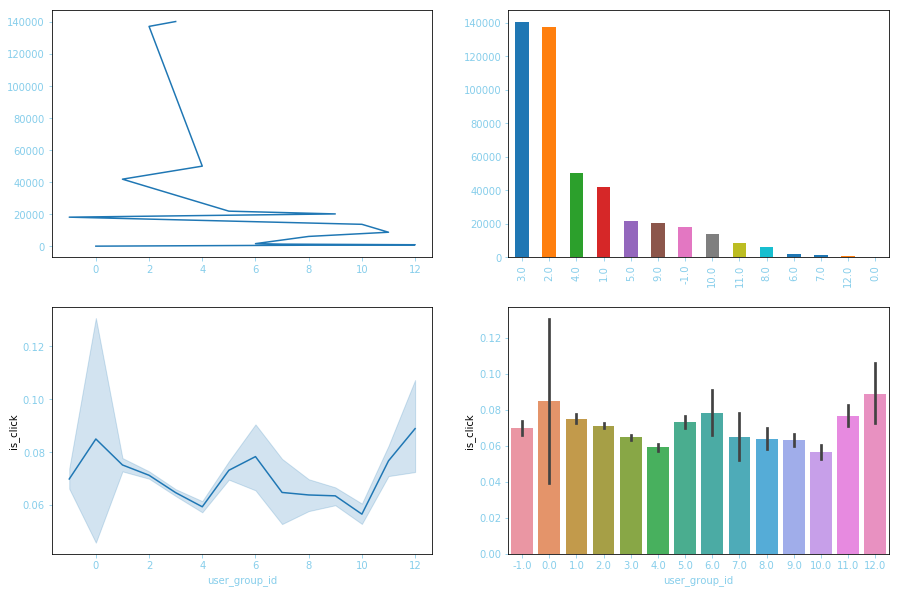

In [170]:
graphs_analysis(train, 'user_group_id', 'is_click', color_label='skyblue')

In [173]:
train['gender'].value_counts(dropna=False)

Male      393454
Female     51594
-1         18243
Name: gender, dtype: int64

In [17]:
dicc_gender = {
    'Male': 1,
    'Female': 0,
    '-1': -1,
    -1:-1
}
train['gender'] = train['gender'].map(dicc_gender).astype(int)
test['gender'] = test['gender'].map(dicc_gender).astype(int)

In [176]:
train['gender'].value_counts(dropna=False)

 1    393454
 0     51594
-1     18243
Name: gender, dtype: int64

In [186]:
test['gender'].value_counts(dropna=False)

 1    108525
 0     14649
-1      5684
Name: gender, dtype: int64

gender    0.001489
dtype: float64


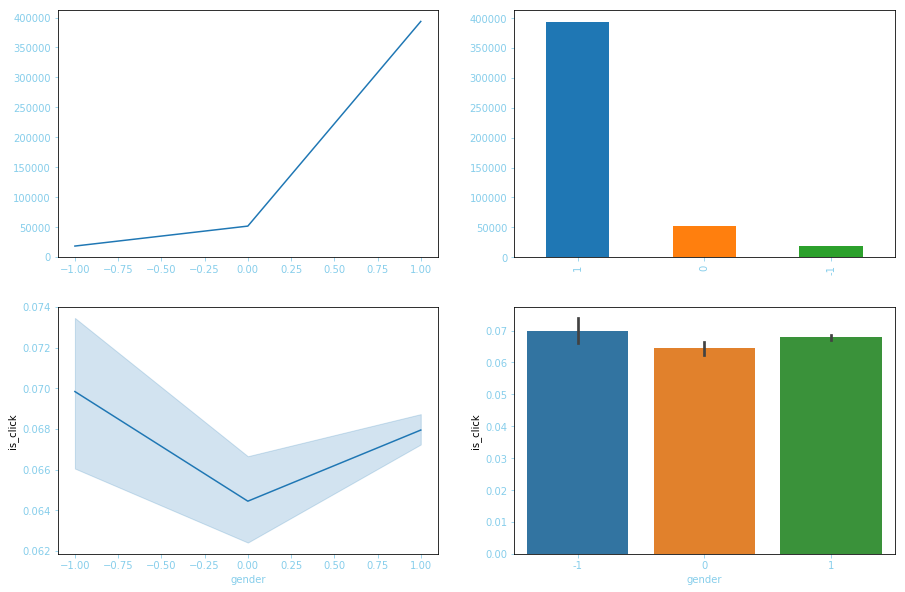

In [177]:
graphs_analysis(train, 'gender', 'is_click', color_label='skyblue')

In [178]:
train['age_level'].value_counts(dropna=False)

 3.0    160581
 2.0    143501
 4.0     63859
 1.0     43367
 5.0     30828
-1.0     18243
 6.0      2759
 0.0       153
Name: age_level, dtype: int64

age_level   -0.008785
dtype: float64


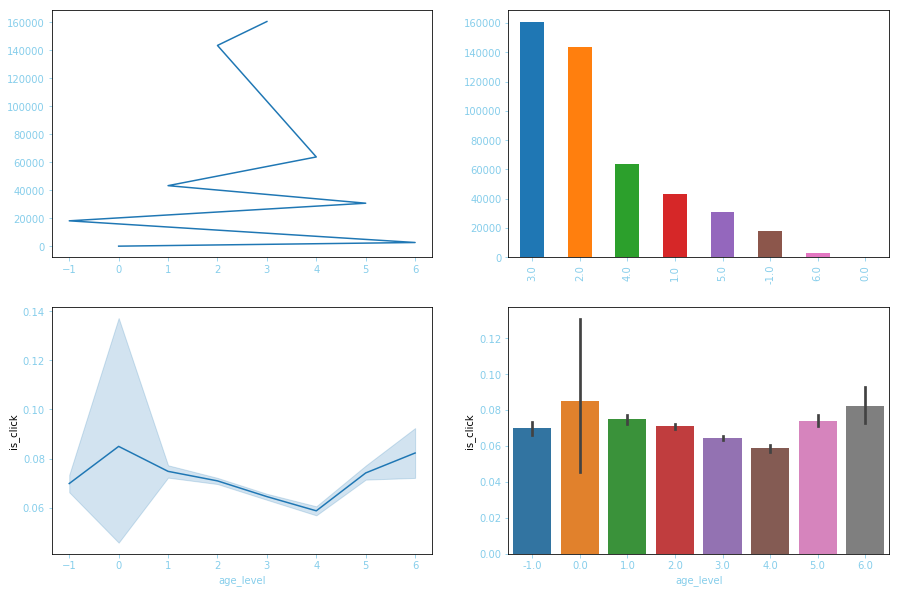

In [179]:
graphs_analysis(train, 'age_level', 'is_click', color_label='skyblue')

In [180]:
train['user_depth'].value_counts(dropna=False)

 3.0    402798
 2.0     30389
-1.0     18243
 1.0     11861
Name: user_depth, dtype: int64

user_depth   -0.00201
dtype: float64


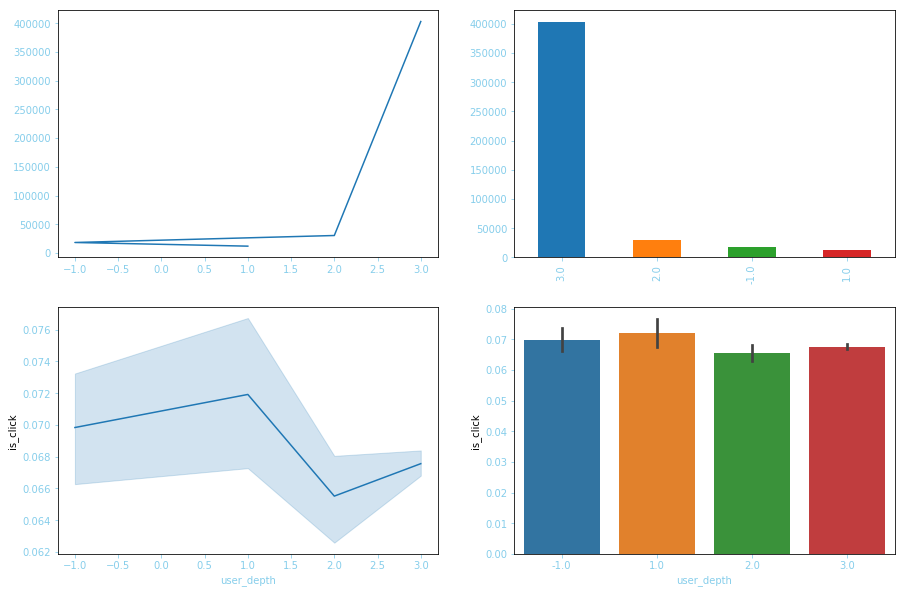

In [181]:
graphs_analysis(train, 'user_depth', 'is_click', color_label='skyblue')

In [187]:
train.dtypes

session_id                     int64
user_id                        int64
product                       object
campaign_id                    int64
webpage_id                     int64
product_category_1             int64
user_group_id                float64
gender                         int64
age_level                    float64
user_depth                   float64
var_1                          int64
is_click                       int64
date                  datetime64[ns]
month                          int64
day                            int64
weekday                        int64
hour                           int64
minute                         int64
dtype: object

hour   -0.003135
dtype: float64


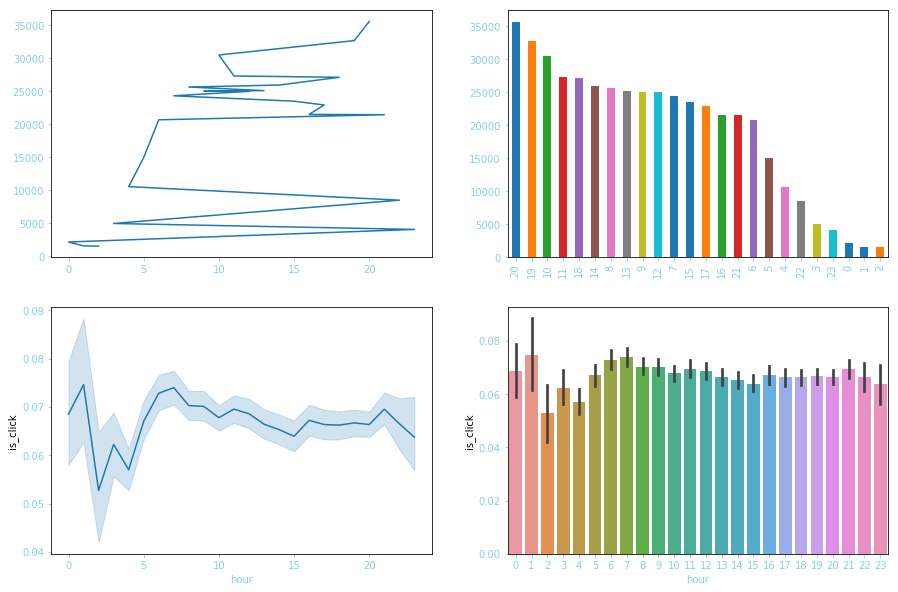

In [188]:
graphs_analysis(train, 'hour', 'is_click', color_label='skyblue')

In [18]:
def func_schedule(x):
    if x >= 2 and x <= 5:
        return 0
    if (x >= 6 and x <= 9) or x == 1:
        return 1
    if x >= 10 and x <= 18:
        return 2
    if x in [19, 20, 21, 22, 23, 0]:
        return 3

train['schedule'] = train['hour'].apply(func_schedule)
test['schedule'] = test['hour'].apply(func_schedule)

In [19]:
del train['date']
del train['month']
del train['weekday']
del train['minute']
del train['day']

del test['date']
del test['month']
del test['weekday']
del test['minute']
del test['day']

In [20]:
null_verificator(train)

'DATA LIMPIA DE NULOS'

In [21]:
null_verificator(test)

'DATA LIMPIA DE NULOS'

In [217]:
train.dtypes

session_id              int64
user_id                 int64
product                object
campaign_id             int64
webpage_id              int64
product_category_1      int64
user_group_id         float64
gender                  int64
age_level             float64
user_depth            float64
var_1                   int64
is_click                int64
hour                    int64
schedule                int64
dtype: object

In [218]:
test.dtypes

session_id              int64
user_id                 int64
product                object
campaign_id             int64
webpage_id              int64
product_category_1      int64
user_group_id         float64
gender                  int64
age_level             float64
user_depth            float64
var_1                   int64
hour                    int64
schedule                int64
dtype: object

In [208]:
train['var_1'].value_counts(dropna=False)

0    267704
1    195587
Name: var_1, dtype: int64

In [209]:
test['var_1'].value_counts(dropna=False)

0    78982
1    49876
Name: var_1, dtype: int64

In [212]:
pd.crosstab(train.var_1, train.gender)

gender,-1,0,1
var_1,,,
0,13055,31523,223126
1,5188,20071,170328


In [213]:
pd.crosstab(train.var_1, train.is_click)

is_click,0,1
var_1,,
0,250249,17455
1,181711,13876


In [214]:
pd.crosstab(train.gender, train.gender)

gender,-1,0,1
gender,,,
-1,18243,0,0
0,0,51594,0
1,0,0,393454


In [224]:
pd.crosstab(train.schedule, train.is_click)

is_click,0,1
schedule,,
0,30141,2002
1,90408,6990
2,213827,15324
3,97584,7015


In [226]:
pd.crosstab(train.schedule, train.gender)

gender,-1,0,1
schedule,,,
0,1240,3950,26953
1,3524,10114,83760
2,9270,26216,193665
3,4209,11314,89076


schedule   -0.001219
dtype: float64


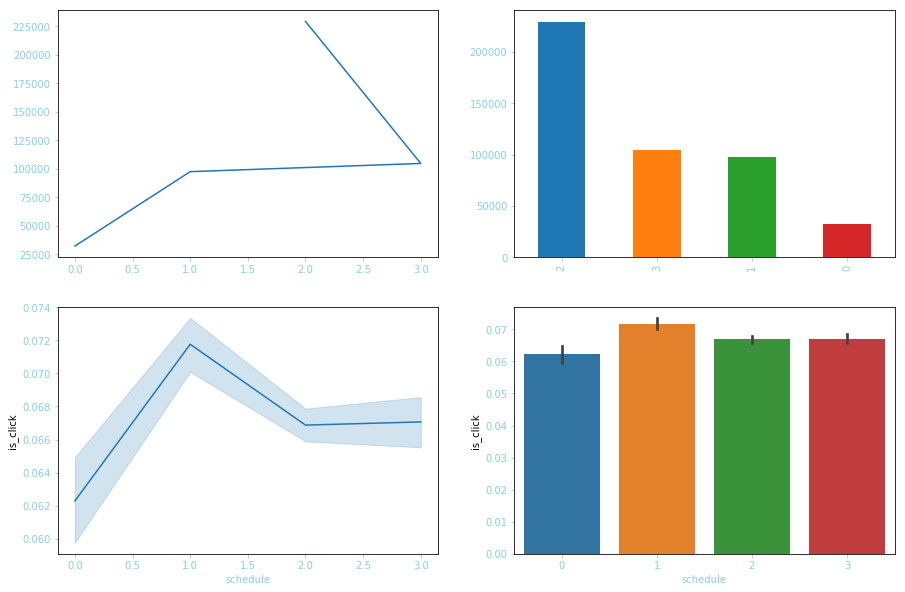

In [225]:
graphs_analysis(train, 'schedule', 'is_click', color_label='skyblue')

In [228]:
null_verificator(test)

'DATA LIMPIA DE NULOS'

In [229]:
set_user_hist = set(historical['user_id'].unique())
len(set_user_hist)

171309

In [230]:
set_user_train = set(train['user_id'].unique())
len(set_user_train)

150347

In [231]:
set_user_test = set(test['user_id'].unique())
len(set_user_test)

66502

In [232]:
set_user_train.issubset(set_user_hist), set_user_test.issubset(set_user_hist)

(False, False)

In [233]:
diff_user_train_hist = set_user_train - set_user_hist
len(diff_user_train_hist)

4837

In [234]:
diff_user_test_hist = set_user_test - set_user_hist
len(diff_user_test_hist)

2702

## ANALISIS TRAIN - TEST

In [22]:
train.columns

Index(['session_id', 'user_id', 'product', 'campaign_id', 'webpage_id',
       'product_category_1', 'user_group_id', 'gender', 'age_level',
       'user_depth', 'var_1', 'is_click', 'hour', 'schedule'],
      dtype='object')

In [23]:
test.columns

Index(['session_id', 'user_id', 'product', 'campaign_id', 'webpage_id',
       'product_category_1', 'user_group_id', 'gender', 'age_level',
       'user_depth', 'var_1', 'hour', 'schedule'],
      dtype='object')

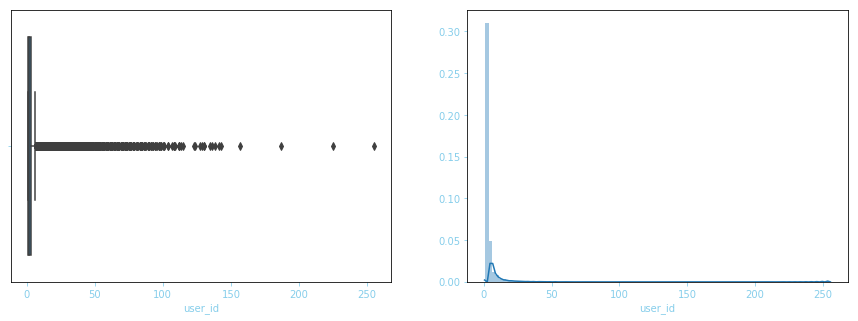

In [25]:
conteo_user_train = train['user_id'].value_counts(dropna=False)
graphs_box_disp(conteo_user_train, color_label='skyblue')

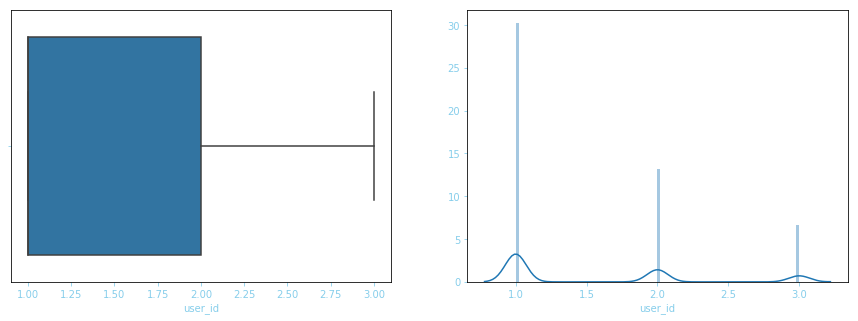

In [246]:
graphs_box_disp(
    conteo_user_train[conteo_user_train < 4],
    color_label='skyblue'
)

In [24]:
conteo_user_test = test['user_id'].value_counts(dropna=False)

In [26]:
train['consume'] = train['user_id'].apply(lambda x: conteo_user_train[x])
test['consume'] = test['user_id'].apply(lambda x: conteo_user_test[x])

consume   -0.051515
dtype: float64


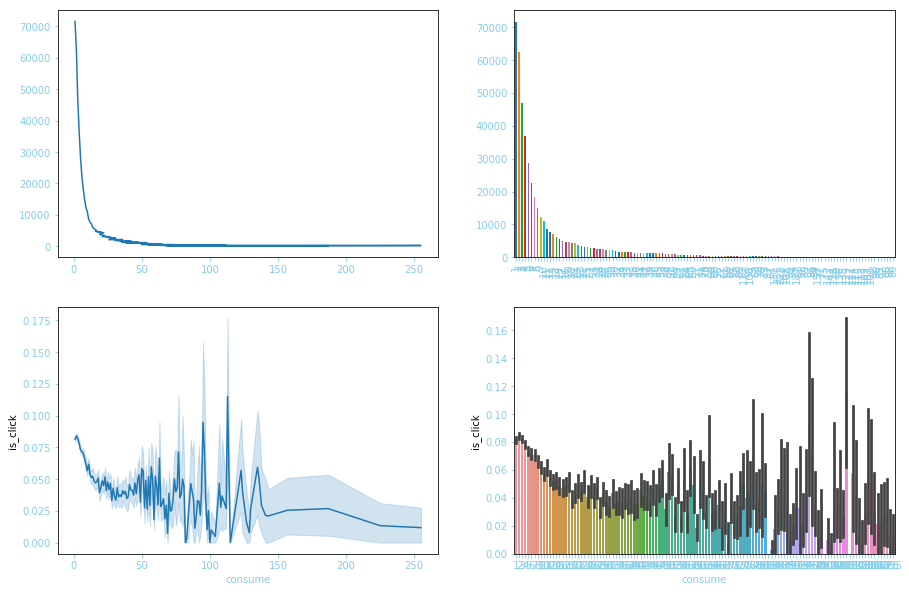

In [265]:
graphs_analysis(train, 'consume', 'is_click', color_label='skyblue')

In [266]:
train.columns

Index(['session_id', 'user_id', 'product', 'campaign_id', 'webpage_id',
       'product_category_1', 'user_group_id', 'gender', 'age_level',
       'user_depth', 'var_1', 'is_click', 'hour', 'schedule', 'consume'],
      dtype='object')

In [27]:
def serie_ratio_convergencia(data, var, col_target='TARGET'):
    df = data.groupby(
        by=[var]
    ).mean()[col_target]
    del df.index.name
    return df

def replace_value_ratio(train, test, lista_vars, col_target='target'):
    for var in lista_vars:
        print('>> ', var.upper())
        serie_ratio = serie_ratio_convergencia(
            train, var, col_target=col_target
        )
        print(train[var].unique())
        print(test[var].unique())
        train[var + '_ratio'] = train[var].apply(lambda x: serie_ratio.get(x, 0))
        test[var + '_ratio'] = test[var].apply(lambda x: serie_ratio.get(x, 0))
    return train, test

In [28]:
del train['user_id']
del test['user_id']

In [29]:
lista_vars = [
   'product', 'campaign_id', 'webpage_id', 'product_category_1',
    'gender', 'age_level', 'user_depth', 'schedule', 'hour'
]
train, test = replace_value_ratio(train, test, lista_vars, col_target='is_click')

>>  PRODUCT
['I' 'C' 'E' 'B' 'H' 'D' 'A' 'F' 'J' 'G']
['E' 'H' 'C' 'D' 'I' 'G' 'J' 'B' 'A' 'F']
>>  CAMPAIGN_ID
[404347 405490  98970 360936 359520 414149 105960 396664  82320 118601]
[ 82320  98970 105960 359520 405490 360936 118601 404347 414149 396664]
>>  WEBPAGE_ID
[53587 60305  6970 13787 45962 11085 51181  1734 28529]
[ 1734  6970 11085 13787 60305 28529 53587 45962 51181]
>>  PRODUCT_CATEGORY_1
[1 3 2 4 5]
[1 2 5 3 4]
>>  GENDER
[ 0  1 -1]
[ 0  1 -1]
>>  AGE_LEVEL
[ 5.  3.  0.  2.  4.  1. -1.  6.]
[ 5.  0.  2. -1.  3.  4.  1.  6.]
>>  USER_DEPTH
[ 2.  3.  1. -1.]
[ 2.  3. -1.  1.]
>>  SCHEDULE
[2 1 3 0]
[2 3 0 1]
>>  HOUR
[14 12 15  9 20 10 19  8 18 16 22  6  3  7 17 11 21  4  5 13  0  1  2 23]
[11 15 10 16 18 17 12 14 13 21 20  5  8  9  7 19  4  6  2  3 23  0 22  1]


In [30]:
lista_vars = [
   'product', 'campaign_id', 'webpage_id', 'product_category_1',
    'gender', 'age_level', 'user_depth', 'schedule', 'hour'
]
for col in lista_vars:
    del train[col]
    del test[col]

,session_id,user_group_id,var_1,is_click,consume,product_ratio,campaign_id_ratio,webpage_id_ratio,product_category_1_ratio,gender_ratio,age_level_ratio,user_depth_ratio,schedule_ratio,hour_ratio
45068,4321,11.0,0,0,1,0.064023,0.077534,0.077534,0.071554,0.064445,0.074153,0.065517,0.066873,0.065304
347168,106452,3.0,1,0,1,0.069149,0.091307,0.091307,0.083524,0.067942,0.064516,0.067560,0.066873,0.068585
47703,538078,0.0,1,0,2,0.068712,0.076829,0.076829,0.061720,0.067942,0.084967,0.067560,0.066873,0.063929
250894,538079,0.0,1,0,2,0.068712,0.076829,0.076829,0.061720,0.067942,0.084967,0.067560,0.071767,0.070101
150872,354959,2.0,1,0,2,0.055074,0.045213,0.054273,0.061720,0.067942,0.070919,0.067560,0.067066,0.066352


In [31]:
X_train = train.drop(['session_id', 'is_click'], axis=1)
y_train = train['is_click']
X_test = test.drop(['session_id'], axis=1)

In [32]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [44]:
X_train.shape

(463291, 12)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, TimeSeriesSplit

kfold_on = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_off = StratifiedKFold(n_splits=5, shuffle=False, random_state=42)

param_grid = {
    'max_depth': [5, 10],
    'n_estimators': [100],
    'learning_rate': [0.01]
}

# lightgbm.LGBMClassifier Python Example - Program Creek
lgb_regressor = lgb.LGBMClassifier(
    save_binary=True
)

gbm_1 = GridSearchCV(lgb_regressor, param_grid, cv=kfold_off, n_jobs=4, scoring='roc_auc')
gbm_1.fit(X_train, y_train)

best_params_1 = gbm_1.best_params_
model_1 = gbm_1.best_estimator_
score_1 = gbm_1.best_score_
score_1

0.6041495070375336

In [36]:
null_verificator(X_test)

'DATA LIMPIA DE NULOS'

In [34]:
lgbm_predict_1 = gbm_1.best_estimator_.predict(X_test)

/home/villacorta/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
lgbm_predict_1

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
train.columns

Index(['session_id', 'user_group_id', 'var_1', 'is_click', 'consume',
       'product_ratio', 'campaign_id_ratio', 'webpage_id_ratio',
       'product_category_1_ratio', 'gender_ratio', 'age_level_ratio',
       'user_depth_ratio', 'schedule_ratio', 'hour_ratio'],
      dtype='object')

In [41]:
test['is_click'] = lgbm_predict_1
prediction = test[['session_id', 'is_click']]
prediction.head(10)

,session_id,is_click
93195,408228,0
106379,538081,0
26083,551065,0
49358,486226,0
49376,63570,0
116116,245341,0
28754,300028,0
53518,396870,0
54927,579020,0
54990,239270,0


In [42]:
prediction['is_click'].value_counts()

0    128858
Name: is_click, dtype: int64

In [43]:
prediction.to_csv('data/prediction_american_1.csv', index=False)